Credit card fraud is an inclusive term for fraud committed using a payment card, such as a credit card or debit card. The purpose may be to obtain goods or services, or to make payment to another account that is controlled by a criminal. The Payment Card Industry Data Security Standard (PCI DSS) is the data security standard created to help businesses process card payments securely and reduce card fraud.

Credit card fraud can be authorised, where the genuine customer themselves processes a payment to another account which is controlled by a criminal, or unauthorised, where the account holder does not provide authorisation for the payment to proceed and the transaction is carried out by a third party.

In this dataset, we will predict the fraud status using several ML models.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import time as tm

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Checking null values.
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Lets look at the basic stats of the data.
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Lets check the data count of the target variable.
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

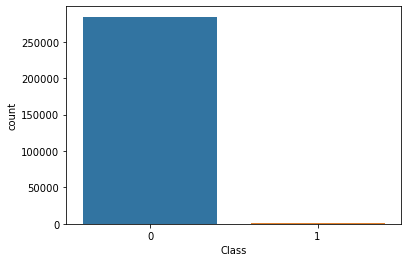

In [6]:
sns.countplot(data['Class'])

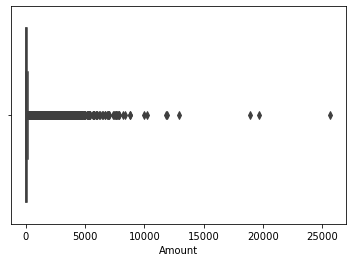

In [8]:
sns.boxplot(data['Amount'])

There are several outliers in the amount variable.

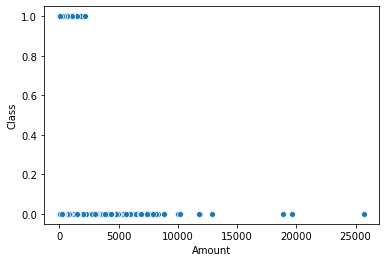

In [9]:
sns.scatterplot(x=data['Amount'],y=data['Class'])

As we can see from the scatter plot above, the fraud transactions have low values.

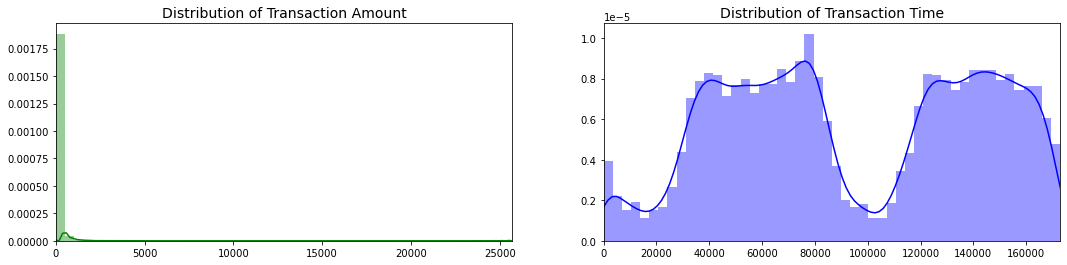

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

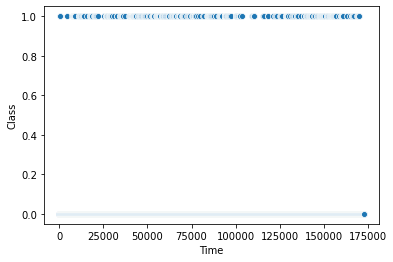

In [14]:
sns.scatterplot(x=data['Time'],y=data['Class'])

From the diagram above, it is clear that there exists no relation between transaction time and fraud transactions.

Now, since the data is highly imbalanced, we need to balance the data for the following reason:

1: Since the data comprises over 99% of genuine transactions, the model will overfit on the same and it won't be able to distinguish between genuine and fraud.

Lets use SMOTE to oversample the data.

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote=SMOTE(sampling_strategy='minority')

In [17]:
X=data.drop(['Class'],1)
y=data['Class']

In [18]:
X_sm,y_sm=smote.fit_sample(X,y)

In [19]:
y_sm.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

Now since our data is balanced, we can deploy several machine learning models to predict the nature of the transaction.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
X_sample=X_sm.sample(n=5000, random_state=33)
y_sample=y_sm.sample(n=5000, random_state=33)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=33)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

In [25]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6, random_state=33).fit(X_train1, y_train1)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=33).fit(X_train1, y_train1)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=33).fit(X_train1, y_train1)


print("Accuracy on validation data for model_10: ",model_10.score(X_val,y_val))
print("Accuracy on validation data for model_50: ",model_50.score(X_val,y_val))
print("Accuracy on validation data for model_100: ",model_100.score(X_val,y_val))

print(" ")

print("Accuracy on test data for model_10: ", model_10.score(X_test,y_test))
print("Accuracy on test data for model_50: ", model_50.score(X_test,y_test))
print("Accuracy on test data for model_100: ", model_100.score(X_test,y_test))

Accuracy on validation data for model_10:  0.97
Accuracy on validation data for model_50:  0.9785714285714285
Accuracy on validation data for model_100:  0.9842857142857143
 
Accuracy on test data for model_10:  0.9786666666666667
Accuracy on test data for model_50:  0.9826666666666667
Accuracy on test data for model_100:  0.9826666666666667


Since we got the highest accuracy on model 100, we will now calculate the feature importance.

Text(0.5, 0, 'Feature Importance Score')

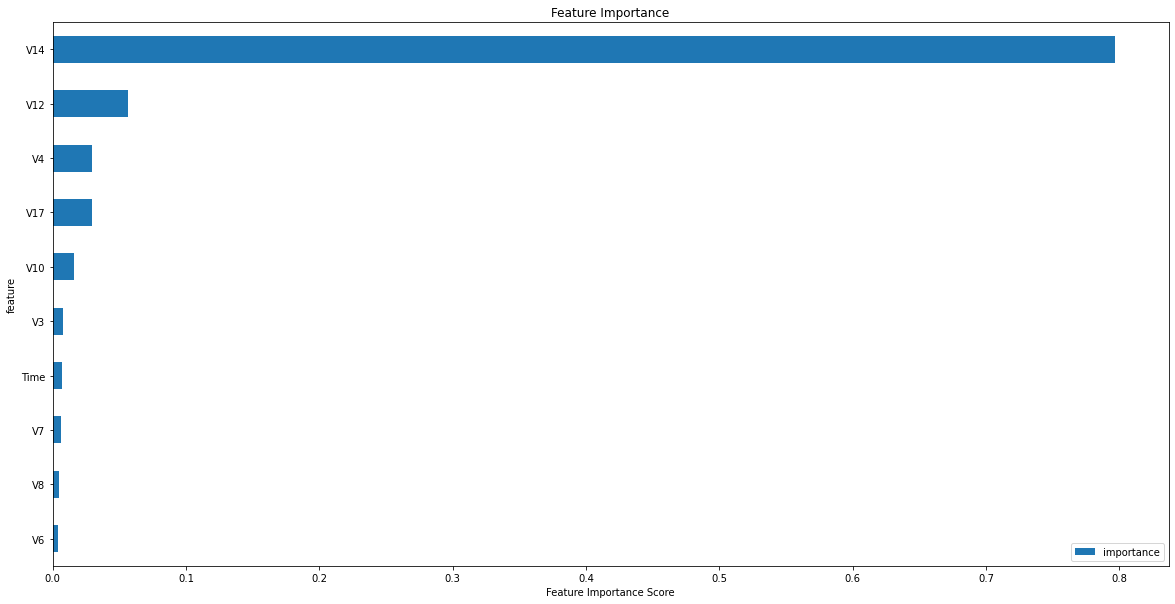

In [26]:
feat_imp = pd.DataFrame({'importance':model_100.feature_importances_})    
feat_imp['feature'] = X_train1.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:10]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=False)
feat_imp.plot.barh(title="Feature Importance", figsize=(20,10))
plt.xlabel('Feature Importance Score')

In [31]:
dtree=DecisionTreeClassifier()
ada=AdaBoostClassifier()
gradB=GradientBoostingClassifier()
rfc=RandomForestClassifier()
log_reg=LogisticRegression()

In [34]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [log_reg, dtree, rfc, model_100]


for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.5147058823529411, 0.5254010695187166, ...",0.996444
DecisionTreeClassifier,"[0.0, 0.03590425531914894, 1.0]","[0.0, 0.9745989304812834, 1.0]",0.969347
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.7406417112299465, 0.8048128342245989, ...",0.999093
GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.001336898395721925, 0.0026737967914438...",0.999209


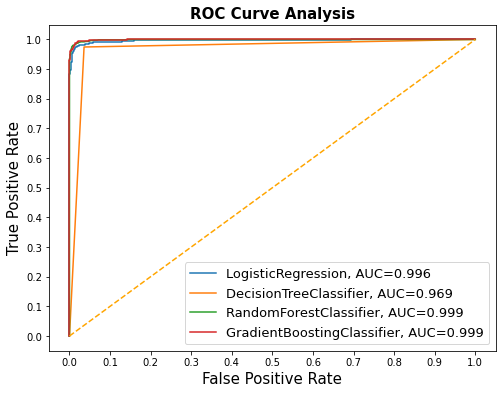

In [35]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']));
    
plt.plot([0,1], [0,1], color='orange', linestyle='--');

plt.xticks(np.arange(0.0, 1.1, step=0.1));
plt.xlabel("False Positive Rate", fontsize=15);

plt.yticks(np.arange(0.0, 1.1, step=0.1));
plt.ylabel("True Positive Rate", fontsize=15);

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15);
plt.legend(prop={'size':13}, loc='lower right');

In [36]:
y_pred_GradB=model_100.predict(X_test)

In [37]:
print(classification_report(y_pred_GradB,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       759
           1       0.98      0.99      0.98       741

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500

